## Milestone 4: Global Land-Ocean Temperature Index Data Set Analysis
### By Mitra Iyer
### December 12th, 2025

#### imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read in CSV

In [40]:
df = pd.read_csv("global-land-oceantempindex_cleaned.csv")

## Question 1: Does the global mean temperature anomaly show evidence of accelerating warming since 1880?

#### make the year and temp anomaly variables

In [41]:
year = df["year"].values
temp_anomaly = df["temp anomaly"].values

#### get the linear coefficients and the linear fit values

In [42]:
linear_coeffs = np.polyfit(year, temp_anomaly, 1)  # degree 1
linear_fit = np.polyval(linear_coeffs, years)

#### get the quadratic values to check acceleration

In [43]:
quad_coeffs = np.polyfit(year, temp_anomaly, 2)  # degree 2
quad_fit = np.polyval(quad_coeffs, year)

#### plotting

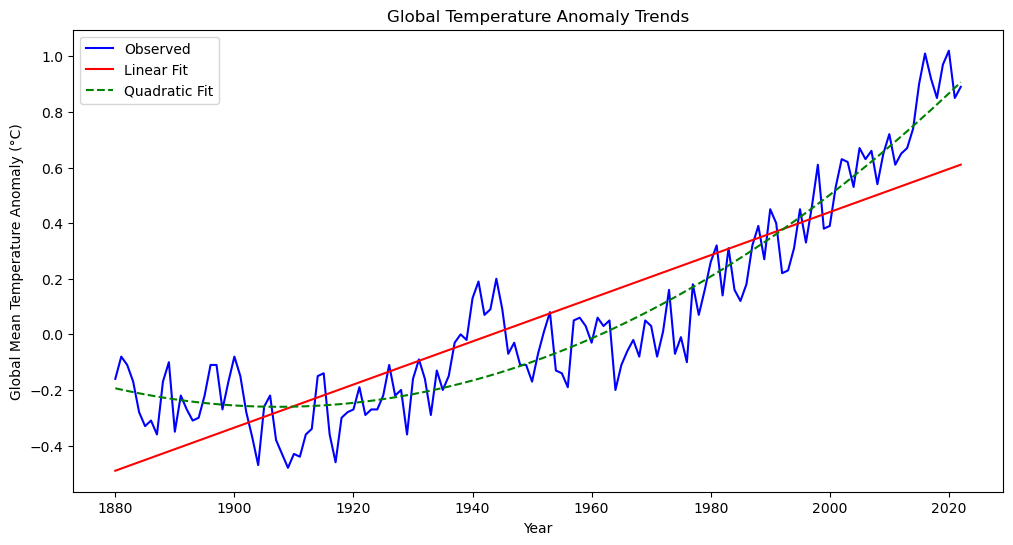

In [45]:
plt.figure(figsize=(12,6))
plt.plot(year, temp_anomaly, label='Observed', color='blue')
plt.plot(year, linear_fit, label='Linear Fit', color='red')
plt.plot(year, quad_fit, label='Quadratic Fit', color='green', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly Trends')
plt.legend()
plt.show()

#### print out the quadratic coefficient to show acceleration

In [14]:
print(f"Quadratic coefficient (a) = {quad_coeffs[0]:.6f}")
if quad_coeffs[0] > 0:
    print("Positive quadratic term suggests accelerating warming.")
else:
    print("No evidence of acceleration.")

Quadratic coefficient (a) = 0.000089
Positive quadratic term suggests accelerating warming.


## Question 2: What is the rate of warming per decade, and has that rate accelerated?

#### check columns

In [36]:
df.columns

Index(['year', 'temp anomaly', 'smoothed temp anomaly'], dtype='object')

#### check decades

In [37]:
df["Decade"] = (df["year"] // 10) * 10

#### find decade averages

In [39]:
decade_avg = df.groupby("Decade")["temp anomaly"].mean()

#### find linear coefficents and warming rates

In [40]:
coeffs = np.polyfit(decade_avg.index, decade_avg.values, 1)
warming_rate_per_decade = coeffs[0] * 10 

#### plot the figure 

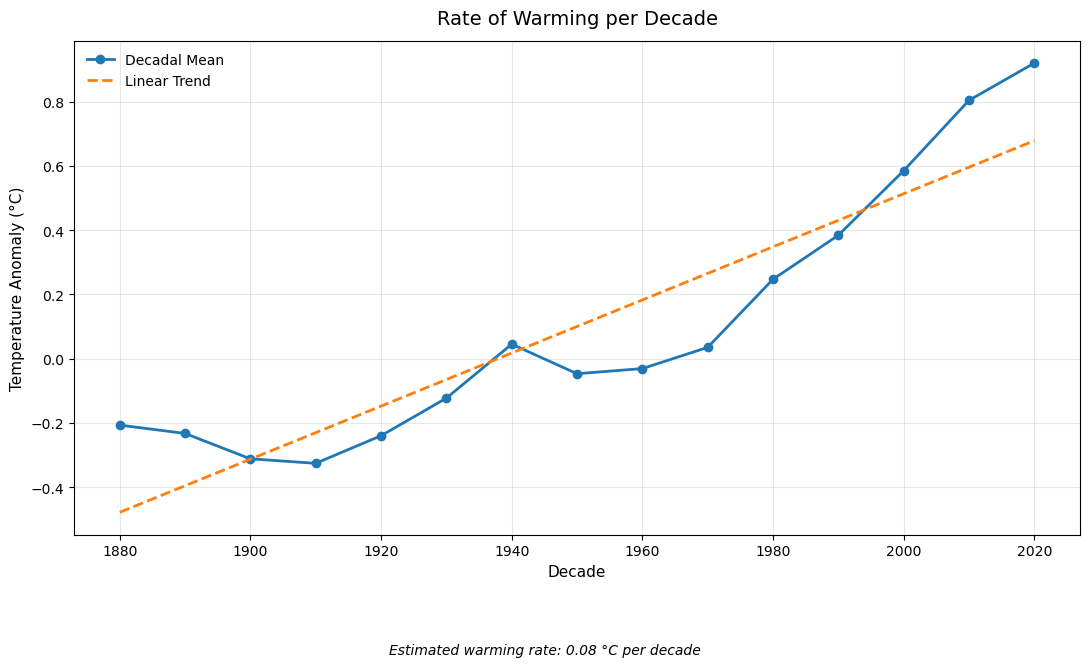

In [41]:
plt.figure(figsize=(11,6))

plt.plot(
    decade_avg.index,
    decade_avg.values,
    marker='o',
    linewidth=2,
    label="Decadal Mean"
)

plt.plot(
    decade_avg.index,
    np.polyval(coeffs, decade_avg.index),
    linestyle='--',
    linewidth=2,
    label="Linear Trend"
)

plt.xlabel("Decade", fontsize=11)
plt.ylabel("Temperature Anomaly (°C)", fontsize=11)
plt.title("Rate of Warming per Decade", fontsize=14, pad=12)

plt.legend(frameon=False)
plt.grid(alpha=0.3)

plt.figtext(
    0.5, -0.10,
    f"Estimated warming rate: {warming_rate_per_decade:.2f} °C per decade",
    ha="center",
    fontsize=10,
    style="italic"
)

plt.tight_layout()
plt.show()


#### print out the warming rate

In [46]:
print(f"Warming rate: {warming_rate_per_decade:.2f} °C per decade")

Warming rate: 0.08 °C per decade


#### Conclusion: The warming rate of each decade is shown to increase over the years. From 1950, it starts to increase more, and there were dips from 1880 to 1940, and from 1940 to 1960.

### get temp anomaly

In [46]:
anomaly_series = df["temp anomaly"]

max_lag = 50 #how many years back you compare to

lags = range(1, max_lag + 1)
autocorr = [anomaly_series.autocorr(lag) for lag in lags]

#### plot the line

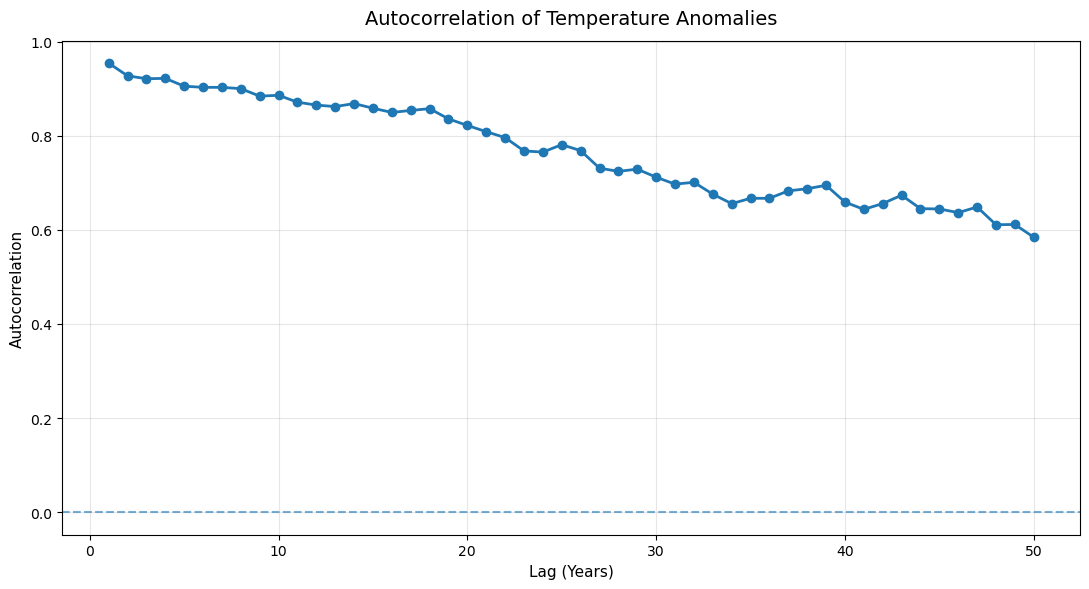

In [54]:
plt.figure(figsize=(11,6))

plt.plot(
    lags,
    autocorr,
    linewidth=2,
    marker='o'
)

plt.axhline(0, linestyle='--', alpha=0.6)

plt.xlabel("Lag (Years)", fontsize=11)
plt.ylabel("Autocorrelation", fontsize=11)
plt.title(
    "Autocorrelation of Temperature Anomalies",
    fontsize=14,
    pad=12
)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


#### print out the correlation table to make sure values match and show correlation

In [49]:
autocorr_df = pd.DataFrame({
    'Lag': lags,
    'Autocorrelation': autocorr
})


In [52]:
autocorr_df.head()

,Lag,Autocorrelation
0,1,0.954146
1,2,0.927160
2,3,0.921046
3,4,0.921727
4,5,0.905150


In [53]:
autocorr_df.tail()

,Lag,Autocorrelation
45,46,0.636530
46,47,0.648485
47,48,0.610885
48,49,0.611348
49,50,0.584242


### Conclusion: Autocorrelation shows that temperatures in consecutive years are strongly related, but as we look further into the past, that relationship weakens. This tells us that while natural cycles exist, the long-term warming trend dominates over decades. It’s useful for understanding climate variability and improving predictions.

In [ ]:
linear_coeffs = np.polyfit(years, temp_anomaly, 1)
quad_coeffs = np.polyfit(years, temp_anomaly, 2)

### Conclusion:
### The analysis shows that global temperatures have been increasing steadily over time, with the rate of warming becoming faster in recent decades. This indicates that warming is not only happening, but accelerating.
### The periodic pattern analysis suggests that there are short-term ups and downs in temperature that repeat over several years. These fluctuations are likely related to natural climate variability. However, they occur on top of a much stronger long-term warming trend, meaning natural cycles alone cannot explain the overall rise in temperature. 


### Thank you!